In [1]:
import bcg
import numpy as np
import scipy.sparse, scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

# Dense Matrices

In [2]:
x_0 = np.zeros(100)
Sigma_0 = np.eye(100)

In [3]:
# First create a test problem
sqrtA = np.random.normal(size=(100,100))
A = sqrtA.dot(sqrtA.T)
x = np.random.normal(size=100)
b = A.dot(x)

First we demonstrate how to get the posterior covariance.

In [4]:
# Knowing the 'true value' of nu_m at m=d helps to decide how to set eps
nu_d = np.linalg.norm(b) / 100
print(nu_d)

15.4259300557


In [5]:
result = bcg.bcg_dense(A, b, x_0, Sigma_0, nu_d*0.25)
print(result.n_iter)

86


14.0


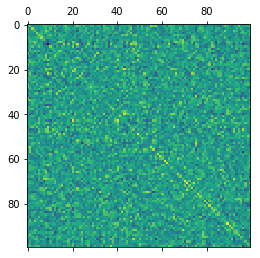

In [6]:
x_m = result.x_m
Sigma_m = Sigma_0 - result.Sigma_F.dot(result.Sigma_F.T)
print(np.trace(Sigma_m))
plt.matshow(Sigma_m)

Now solve the problem to m=d using BCG, with and without batch directions.

In [7]:
result = bcg.bcg_dense(A, b, x_0, Sigma_0, 0.0, detailed=True)

In [8]:
result_batch = bcg.bcg_dense(A, b, x_0, Sigma_0, 0.0, detailed=True, batch_directions=True)

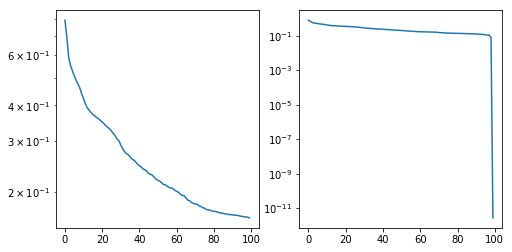

In [9]:
# plot the output
convergence = np.linalg.norm(result.previous_x - x[:,None], axis=0) / np.linalg.norm(x)
convergence_batch = np.linalg.norm(result_batch.previous_x - x[:,None], axis=0) / np.linalg.norm(x)
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].semilogy(convergence)
axes[1].semilogy(convergence_batch)

Note that in this setting when convergence is slow, the batch directions ensure that convergence is achieved at $m=d$. Otherwise conjugacy is lost and this will not hold.

# Sparse Matrices


In [10]:
x_0 = np.zeros(100)
Sigma_0 = scipy.sparse.eye(100)

Generating "nice enough" sparse symmetric positive-definite matrices in Python is a bit of a pain, so we'll load one I made in MatLab.

In [11]:
# create a sparse test problem
A = scipy.io.loadmat('sparse_matrix.mat')['spmat']
x = np.random.normal(size=100)
b = A.dot(x)

In [12]:
ichol_factor = bcg.ichol(A)

Run once with the same prior as above, but now sparse, and once with the incomplete Cholesky prior.

In [13]:
result = bcg.bcg_sparse(A, b, x_0, Sigma_0, 0.0, detailed=True)

In [14]:
result_ichol = bcg.bcg_preconditioned_ichol(A, b, x_0, ichol_factor, 0.0, detailed=True)

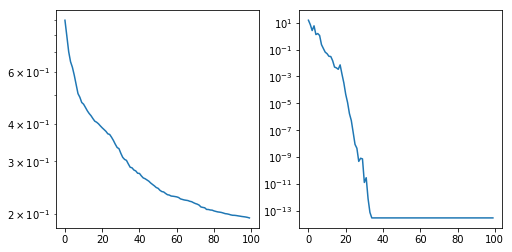

In [15]:
# plot the output
convergence = np.linalg.norm(result.previous_x - x[:,None], axis=0) / np.linalg.norm(x)
convergence_ichol = np.linalg.norm(result_ichol.previous_x - x[:,None], axis=0) / np.linalg.norm(x)
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].semilogy(convergence)
axes[1].semilogy(convergence_ichol)

The difference made by using the cholesky prior covariance is clear!